<center>

# **CS353 ML Lab EndSem**

## Name: K V Sumanth Reddy
## Roll No: 181CO225
### Batch: Section 2
### Date: 13/04/2021
---
### Q: Predict Daily Deaths in Canada with the given dataset
---
#### **Dataset Used: time_series_covid19_deaths_global.csv**
</center>

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
#using ARIMA model - Auto Regressive Integrated Moving Average

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preprocessing

In [2]:
df=pd.read_csv('time_series_covid19_deaths_global.csv')
dataset = df.loc[df['Country/Region'] == 'Canada'] #print only canadian states
print(dataset)

               Province/State Country/Region      Lat  ...  4/8/21  4/9/21  4/10/21
39                    Alberta         Canada  53.9333  ...    2005    2007     2012
40           British Columbia         Canada  53.7267  ...    1493    1495     1495
41           Diamond Princess         Canada   0.0000  ...       1       1        1
42             Grand Princess         Canada   0.0000  ...       0       0        0
43                   Manitoba         Canada  53.7609  ...     946     949      949
44              New Brunswick         Canada  46.5653  ...      31      32       33
45  Newfoundland and Labrador         Canada  53.1355  ...       6       6        6
46      Northwest Territories         Canada  64.8255  ...       0       0        0
47                Nova Scotia         Canada  44.6820  ...      66      66       66
48                    Nunavut         Canada  70.2998  ...       4       4        4
49                    Ontario         Canada  51.2538  ...    7478    7496  

In [3]:
#dropping columns and cleaning the dataset
dataset = dataset.drop(['Country/Region','Province/State','Lat','Long'], axis =1 )
dataset.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1890,1902,1911,1913,1914,1914,1920,1926,1928,1933,1935,1940,1946,1949,1952,1956,1957,1957,1961,1963,1968,1971,1973,1976,1979,1980,1983,1983,1987,1990,1994,1994,1994,1994,1998,2001,2002,2005,2007,2012
40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1365,1372,1376,1380,1380,1380,1391,1393,1394,1397,1397,1397,1397,1407,1407,1411,1419,1421,1421,1421,1437,1438,1441,1446,1449,1449,1449,1455,1455,1458,1463,1463,1463,1463,1463,1489,1491,1493,1495,1495
41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,898,901,903,904,905,907,907,907,908,911,912,916,917,917,917,917,918,919,920,927,928,929,929,929,932,933,934,934,934,935,937,937,938,938,940,942,943,946,949,949
44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28,28,28,28,28,28,28,29,29,29,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,31,31,32,33
45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66
48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [4]:
#adding all the canadian state death cases into one column
newdataset = pd.DataFrame(columns = dataset.columns)
newdataset.loc['Cases'] = df.sum(numeric_only=True, axis=0)
print(newdataset)

       1/22/20  1/23/20  1/24/20  ...     4/8/21     4/9/21    4/10/21
Cases     17.0     18.0     26.0  ...  2901909.0  2915400.0  2927807.0

[1 rows x 445 columns]


In [5]:
newdataset = newdataset.T
print(newdataset)

             Cases
1/22/20       17.0
1/23/20       18.0
1/24/20       26.0
1/25/20       42.0
1/26/20       56.0
...            ...
4/6/21   2872453.0
4/7/21   2887278.0
4/8/21   2901909.0
4/9/21   2915400.0
4/10/21  2927807.0

[445 rows x 1 columns]


## Plotting Cases Trend

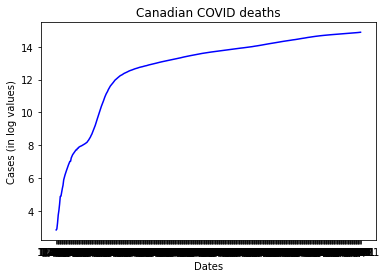

In [6]:
plt.plot(np.log(newdataset['Cases']),color= 'blue')
plt.xlabel("Dates")
plt.ylabel("Cases (in log values)")
plt.title('Canadian COVID deaths')
plt.savefig('Death Trend.png')
plt.show()

## Training the dataset on ARIMA model and predicting cases

In [7]:
model = ARIMA(newdataset, order=(1,1,1))
model = model.fit()

#Now we predict cases 5 days ahead and 5 days behind from current date
y_hat = model.predict(len(newdataset)-5,len(newdataset)+5, typ='levels')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


## Prediction values

In [8]:
#printing all the predictions of 5 days ahead and 5 days from the last available covid data collected day (4/10/21)
y_hat = pd.DataFrame({'Cases':y_hat})
y_hat['Cases']=y_hat['Cases'].astype('int64') 
y_hat.head(10)

,Cases
2021-04-06,2868192
2021-04-07,2884533
2021-04-08,2901646
2021-04-09,2915547
2021-04-10,2927954
2021-04-11,2939418
2021-04-12,2950372
2021-04-13,2960753
2021-04-14,2970636
2021-04-15,2980086


In [9]:
newdataset.tail(5)

,Cases
4/6/21,2872453.0
4/7/21,2887278.0
4/8/21,2901909.0
4/9/21,2915400.0
4/10/21,2927807.0


## Error percentage in prediction

In [10]:
temp1 = newdataset.tail(5)
temp2 = y_hat.head(5)

#Now, we print error in prediction of the last 5 day death cases with the actual death cases
error = abs(temp1 - temp2)
print("Error in death cases")
print("-----------------------")
print(error)
print("-----------------------")
print("Error percentage")
print((error/temp1)*100)

Error in death cases
-----------------------
          Cases
4/6/21   4261.0
4/7/21   2745.0
4/8/21    263.0
4/9/21    147.0
4/10/21   147.0
-----------------------
Error percentage
            Cases
4/6/21   0.148340
4/7/21   0.095072
4/8/21   0.009063
4/9/21   0.005042
4/10/21  0.005021


We can see that the error precentage using a ARIMA model is very less and hence ARIMA model can be used to predict Canadian COVID death cases